<a href="https://colab.research.google.com/github/narayana111100/capstone-project-2/blob/main/time_series_sales_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sales-cars.csv",parse_dates = ['Month'], index_col = 'Month')

In [ ]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


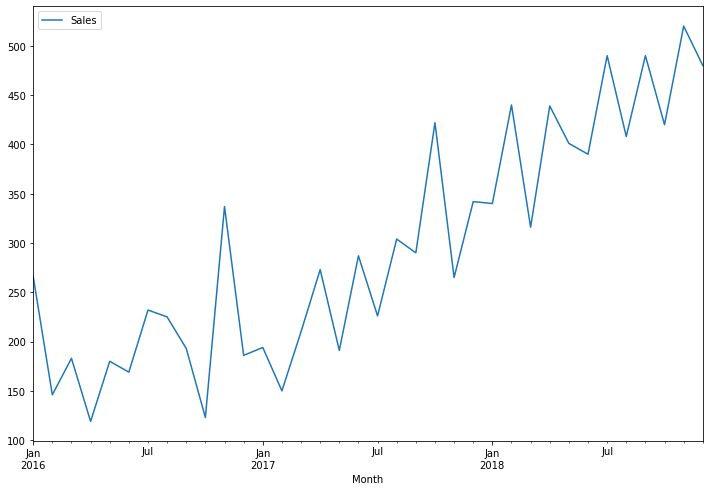

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']= 12,8
df.plot()
plt.show()

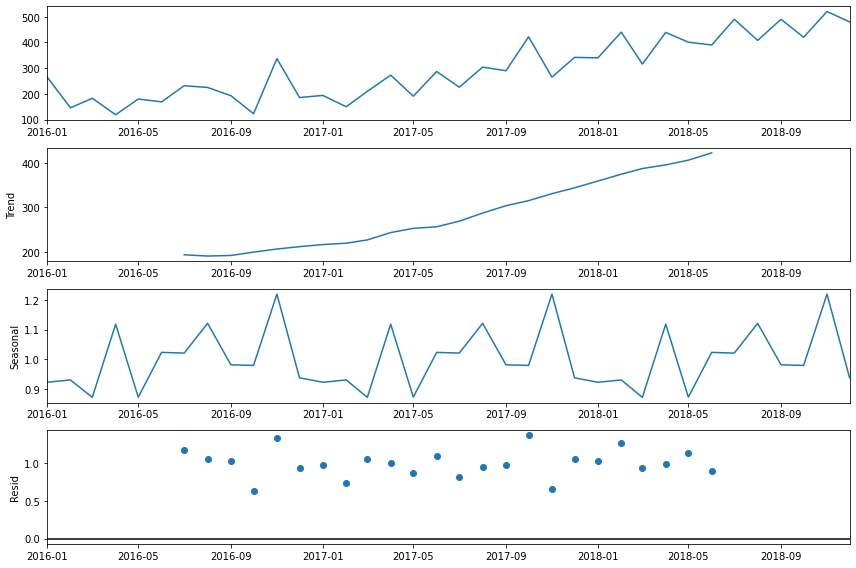

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_mul = seasonal_decompose(df,model="multiplicative")
df_mul.plot()
plt.show()

AUTO CORRELATIONS

In [ ]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [ ]:
df.shift(1).head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0


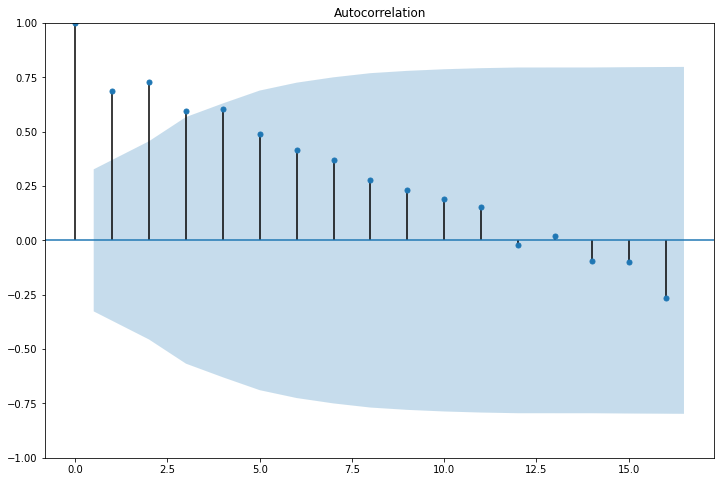

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf    # its slowly decaying if it is sloly decaying it is showing thatthe series is not stationary
plot_acf(df)
plt.show()

##STATIONARITY
means mean,covariance and variance is constant over periods.

CONVERTING SERIES TO STATIONARY

In [ ]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [ ]:
df_diff = df.diff(periods = 1)   # Intregated of order 1 it is 1 because we are taking 1 lag or one time period difference and it is denoted by D, one of the parameter of ARIMA model

In [ ]:
df_diff.head()


,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [ ]:
#Removing nan value
df_diff = df_diff[1:]
df_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


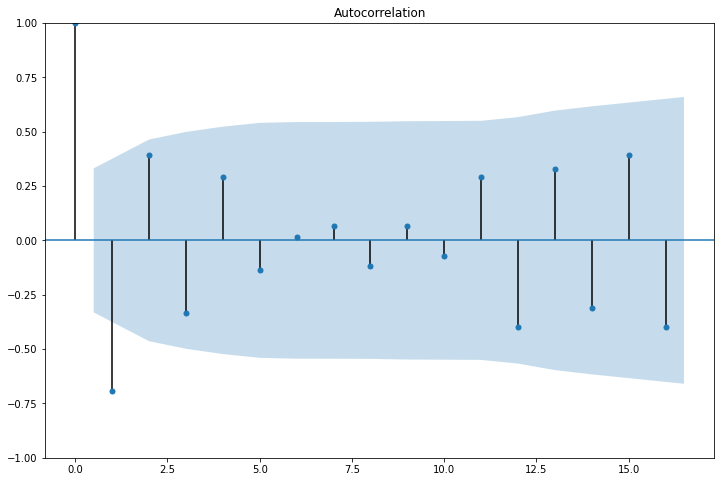

In [ ]:
plot_acf(df_diff)     # so we can say that it is quickly decayed and went to negative so this is very good stationary
plt.show()

ADFULLER TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest = adfuller(df['Sales'], autolag = 'AIC')
print("1. ADF :",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags :",dftest[2])
print("4. Num of observation used for ADF Regression and Critical Values Calculation :",dftest[3])
print("5. Critical value:")
for key, val in dftest[4].items():
  print("\t",key,":",val)

1. ADF : 1.636883157269032
2. P-value: 0.9979641164504948
3. Num of Lags : 10
4. Num of observation used for ADF Regression and Critical Values Calculation : 25
5. Critical value:
	 1% : -3.7238633119999998
	 5% : -2.98648896
	 10% : -2.6328004


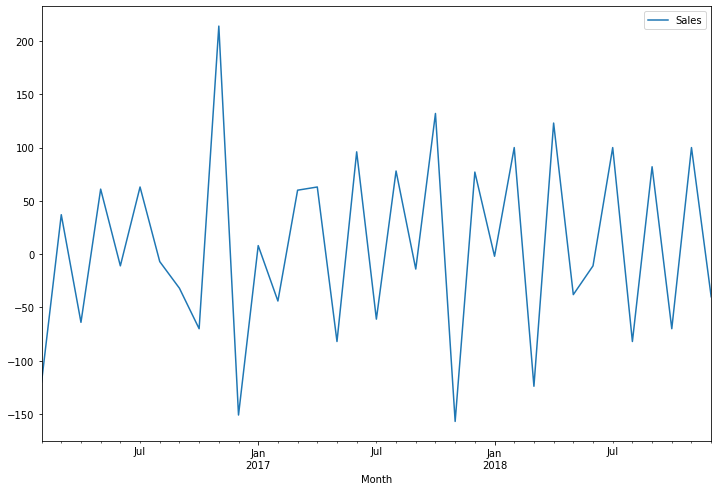

In [ ]:
df_diff.plot()

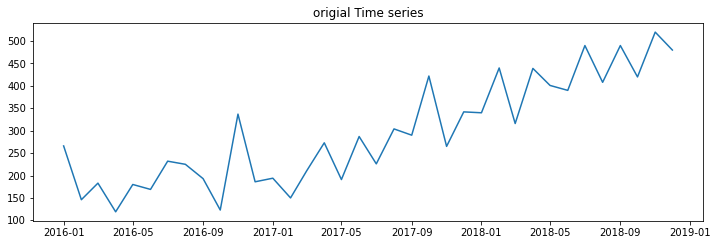

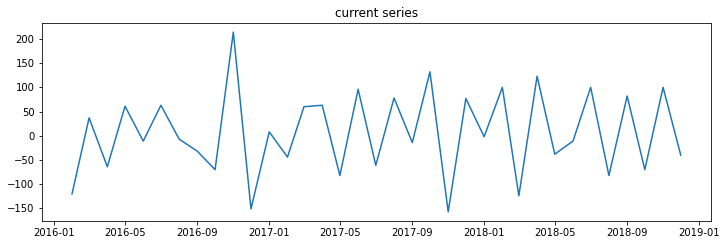

In [ ]:
# comparing original with current curve
plt.subplot(2,1,1)
plt.title("origial Time series")
plt.plot(df)
plt.show()

plt.subplot(2,1,1)                                # NO trend here it is stationary
plt.title("current series")
plt.plot(df_diff)
plt.show()

In [ ]:
df.shape

(36, 1)

In [ ]:
X = df.values
X.size

36

In [ ]:
train = X[0:27]   # 27 data as train 
test = X[27:]     # 9 data as test
predictions = []

In [ ]:
train.size

27

In [ ]:
test.size

9

AUTO REGRESSIVE MODEL

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model_ar = AutoReg(train,lags=5)
model_ar_fit = model_ar.fit()

In [ ]:
start =len(train)
end=len(train)+len(test)-1
pred_ar=model_ar_fit.predict(start=start,end=end)
print(pred_ar)


[398.28757022 383.50675548 455.39149464 399.58836577 444.3970394
 441.64131308 488.92066576 470.18746338 498.77502085]


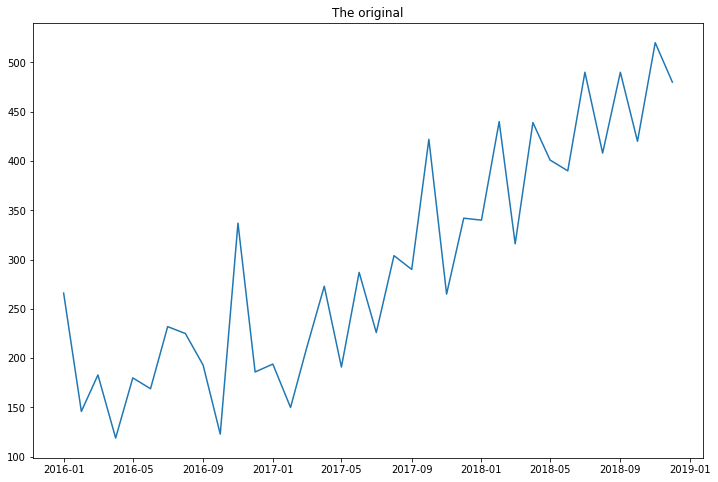

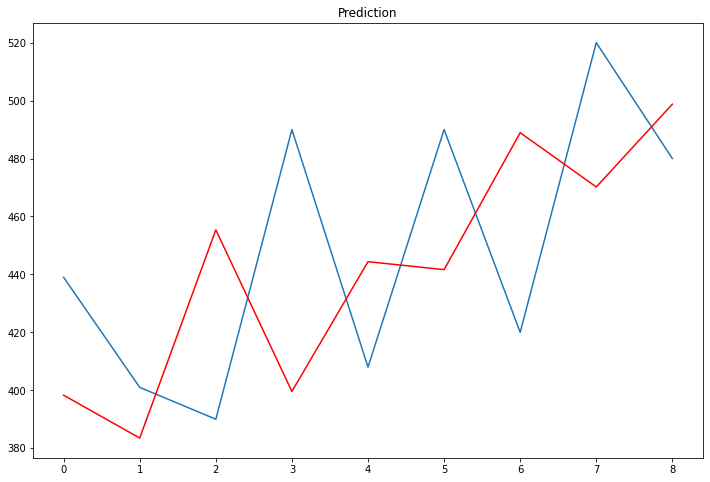

In [ ]:
plt.plot(df)
plt.title("The original")
plt.show()

plt.plot(test)
plt.plot(pred_ar, color='red')
plt.title("Prediction")
plt.show()

In [ ]:
prediction = model_ar_fit.predict(len(train),len(train)+6)
prediction

array([398.28757022, 383.50675548, 455.39149464, 399.58836577,
       444.3970394 , 441.64131308, 488.92066576])

ARIMA MODEL

In [ ]:
from pmdarima import auto_arima
stepwise_arima = auto_arima(df_diff['Sales'],trace=True,
                            supress_warning=True)
stepwise_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=416.144, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=393.511, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=392.993, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=414.316, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=389.100, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=391.069, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=390.618, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=388.716, Time=0.58 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 3.936 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -190.358
Date:                Wed, 17 Aug 2022   AIC                            388.716
Time:                        21:08:35   BIC                            394.938
Sample:                             0   HQIC                           390.864
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.0847      3.007      3.021      0.003       3.191      14.978
ma.L1         -1.1995      0.181     -6.645      0.000      -1.553      -0.846
ma.L2          0.4842      0.210      2.302      0.021       0.072       0.897
sigma2      2963.7417    808.855      3.664      0.000    1378.414    4549.069
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.59   Prob(JB):                         0.98
Heteroskedasticity (H):               0.34   Skew:                             0.07
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm

In [ ]:

#p,d,q = (p) periods taken for autoregressive
#     = if i am taking all the etire six month behind i am taking six periods, p indicate numbe of time uits you are taking previously for regression
# d =  d is order of integrated , how many times differencing is done typically one or two is good value for this
# q = q is your moving average we are taking errors instead of past times

model_arima =sm.tsa.arima.ARIMA(train,order=(4,2,1))
model_arima_fit = model_arima.fit()
print("AIC value should be minimum : ",model_arima_fit.aic)
model_arima_fit.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC value should be minimum :  291.2539541629155


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -139.627
Date:                Wed, 17 Aug 2022   AIC                            291.254
Time:                        21:08:35   BIC                            298.567
Sample:                             0   HQIC                           293.282
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0503      0.265     -3.962      0.000      -1.570      -0.531
ar.L2         -0.7641      0.315     -2.429      0.015      -1.381      -0.148
ar.L3         -0.7298      0.349     -2.091      0.037      -1.414      -0.046
ar.L4         -0.2042      0.260     -0.785      0.432      -0.714       0.305
ma.L1         -0.8678      0.240     -3.614      0.000      -1.338      -0.397
sigma2      3345.3935   1259.572      2.656      0.008     876.678    5814.109
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.77   Prob(JB):                         0.67
Heteroskedasticity (H):               0.80   Skew:                             0.09
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAKE PREDICTION ON DATASET

In [ ]:
start =len(train)
end=len(train)+len(test)-1
pred=model_arima_fit.predict(start=start,end=end,typ='levels')
print(pred)


[395.01275719 373.64512894 445.24218976 393.47327582 432.04872495
 422.64602709 465.65729264 449.53259597 472.03762322]


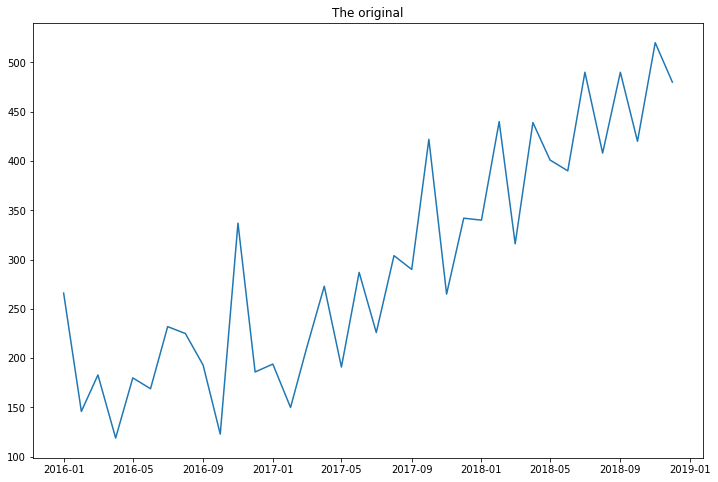

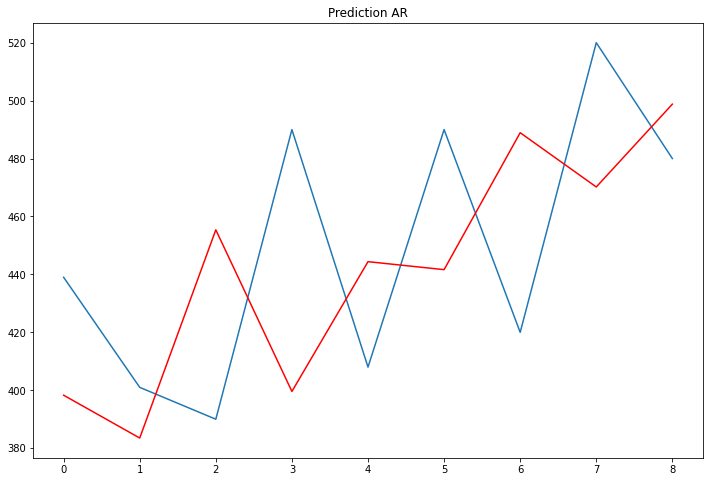

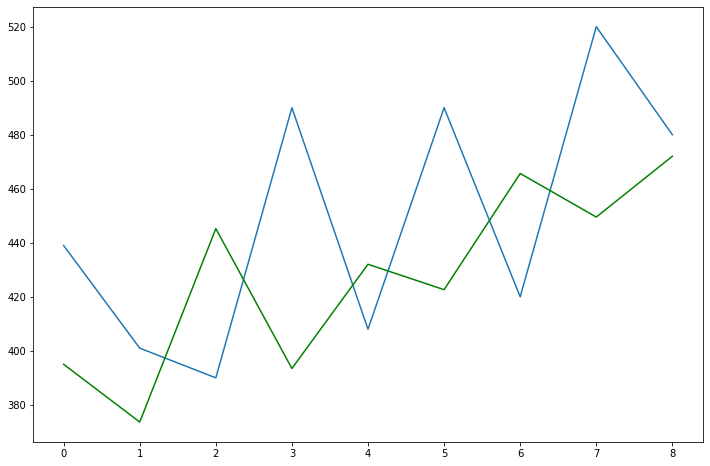

In [ ]:
plt.plot(df)
plt.title("The original")
plt.show()

plt.plot(test)
plt.plot(pred_ar, color='red')
plt.title("Prediction AR")
plt.show()


plt.plot(test)
plt.plot(pred, color = 'green')
plt.show()

In [ ]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(pred,test))
rmse

55.05635112650287

In [ ]:
print(test.mean(),rmse)

448.6666666666667 55.05635112650287


In [ ]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
    model_arima = sm.tsa.arima.ARIMA(train,order=param)
    model_arima_fit = model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
    continue

(0, 0, 0) 319.45286406147864
(0, 0, 1) 318.72448140936064
(0, 0, 2) 315.2506007530104
(0, 0, 3) 316.3853524706433
(0, 0, 4) 309.81638219618935
(0, 1, 0) 309.84124796602856
(0, 1, 1) 298.32614632006397
(0, 1, 2) 296.6105735915721
(0, 1, 3) 297.634250653097
(0, 1, 4) 299.0805206239961
(0, 2, 0) 327.18352274695803
(0, 2, 1) 304.1221724637494
(0, 2, 2) 290.55995422568975
(0, 2, 3) 291.4957885537371
(0, 2, 4) 293.59179045829137
(0, 3, 0) 344.49465685685675
(0, 3, 1) 319.96668737041597
(0, 3, 2) 300.3727273077952
(0, 3, 3) 291.5304014690468
(0, 3, 4) 290.4266225929669
(0, 4, 0) 360.5932760998339
(0, 4, 1) 335.03371908774415
(0, 4, 2) 313.7789268217239
(0, 4, 3) 297.4275421061915
(0, 4, 4) 289.6787766249055
(1, 0, 0) 316.1668717557285
(1, 0, 1) 313.04871846520564
(1, 0, 2) 310.97906423190784
(1, 0, 3) 311.28853015680863
(1, 0, 4) 309.0689970182687
(1, 1, 0) 297.35922755917244
(1, 1, 1) 297.6650628594871
(1, 1, 2) 298.1839727421602
(1, 1, 3) 300.1783653175181
(1, 1, 4) 298.18770195909656
(1, 2